<a href="https://colab.research.google.com/github/santana-robledo/Posgrado_Robotica_e_Inteligencia_Artificial/blob/main/Sistemas%20Inteligentes%20II/02_Predicci%C3%B3n_de_sobrepeso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de sobrepeso con una neurona
## Dr. Carlos Villaseñor

Paso 1. Corre la siguiente casilla para importar la paquetería necesaria.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Paso 2. En la siguiente cassilla de código, pega toda la clase del Perceptron.

In [ ]:
class Perceptron:

  def __init__(self,n_inputs,learning_rate):
    self.w=-1+2*np.random.rand(n_inputs)
    self.b=-1+2*np.random.rand()
    self.lr=learning_rate

  def predict(self,X):
    _,p=X.shape
    y_est=np.zeros(p)
    for i in range(p):
      y_est[i]=np.dot(self.w,X[:,i])+self.b
      if y_est[i]>0:
          y_est[i]=1
      else:
          y_est[i]=0
    return y_est

  def fit(self,X,Y,epochs=50):
      _,p=X.shape
      for _ in range(epochs):
        for i in range(p):
          y_est=self.predict(X[:,i].reshape(-1,1))
          self.w+=self.lr *(Y[i]-y_est)*X[:,i]
          self.b += self.lr *(Y[i]-y_est)

Paso 3. Instancía la siguiente función para poder dibujar la línea que representa el Perceptrón.

In [ ]:
# Función para dibujar superficie de desición
def draw_2d_percep(model, xmin, xmax):
  w1, w2, b = model.w[0], model.w[1], model.b
  plt.plot([xmin, xmax],[(1/w2)*(-w1*xmin-b),(1/w2)*(-w1*xmax-b)],'--k')

Paso 4. Completa el siguiente codigo para generar datos de personas con y sin sobrepeso. Considera a personas con un peso mínimo de 40Kg y un peso máximo de 120, de igual manera, una altura mínima de 1 metro y una máxima de 2.2 metros.

In [ ]:
p = 100

# Crear datos
X = np.zeros((2,p))
Y = np.zeros(p)
for i in range(p):
  # masa aleatoria
  X[0,i] = 40+(180-40)*np.random.rand()

  # estatura aleatoria
  X[1,i] = 1.2 + (2.4 - 1.2) * np.random.rand()

  # Calcular IMC

  imc = X[0,i] / X[1,i]**2

  if imc >= 25:
    Y[i]=1
  else:
    Y[i]=0

Paso 5. Entrena el modelo y dibuja los resultados

/tmp/ipython-input-530949394.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_est[i]=np.dot(self.w,X[:,i])+self.b


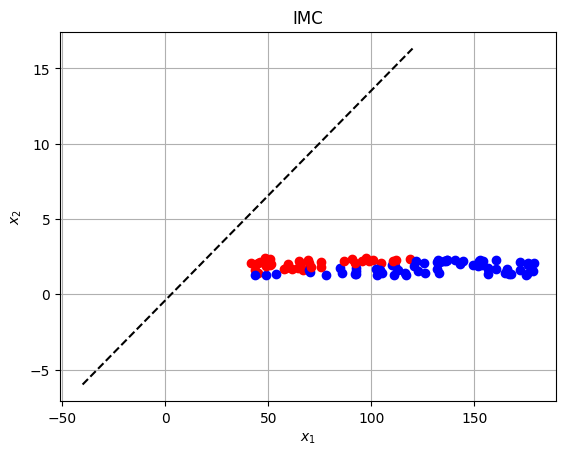

In [ ]:
# Crear y entrenar modelo
model = Perceptron(2, 0.1)
model.fit(X, Y, epochs=20)

# Dibujar resultados
plt.figure()
for i in range(p):
  if Y[i] == 0:
    plt.plot(X[0,i],X[1,i], 'or')
  else:
    plt.plot(X[0,i],X[1,i], 'ob')

plt.title('IMC')
plt.grid('on')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

draw_2d_percep(model, -40, 120)

Paso 6. Repite el paso anterior pero ahora normaliza los datos

/tmp/ipython-input-530949394.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_est[i]=np.dot(self.w,X[:,i])+self.b


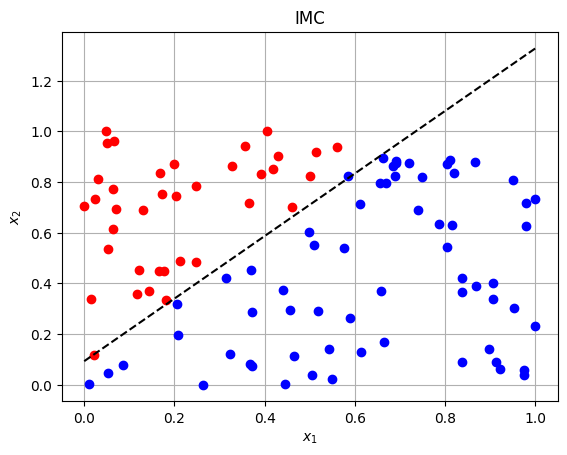

In [ ]:
# Normalizar datos
X[0,:] = (X[0,:]-np.min(X[0,:]))/(np.max(X[0,:])-np.min(X[0,:]))
X[1,:] = (X[1,:]-np.min(X[1,:]))/(np.max(X[1,:])-np.min(X[1,:]))

# Crear y entrenar modelo
model = Perceptron(2, 0.1)
model.fit(X, Y, epochs=20)

# Dibujar resultados
plt.figure()
for i in range(p):
  if Y[i] == 0:
    plt.plot(X[0,i],X[1,i], 'or')
  else:
    plt.plot(X[0,i],X[1,i], 'ob')

plt.title('IMC')
plt.grid('on')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

draw_2d_percep(model, 0, 1)